In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
# load the dataset
dataframe = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)



In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))



In [7]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



Epoch 1/100
94/94 - 2s - loss: 0.0328 - 2s/epoch - 24ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0157 - 162ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0127 - 175ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0115 - 171ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0105 - 157ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0096 - 155ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0086 - 171ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0076 - 168ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0067 - 172ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0059 - 168ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0050 - 161ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0043 - 175ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0037 - 151ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0032 - 154ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0028 - 174ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0027 - 154ms/epoc

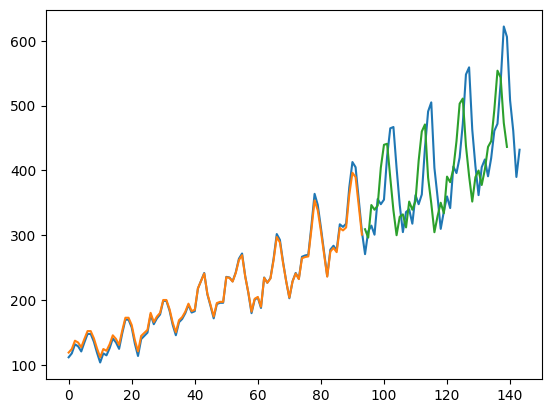

In [8]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredict)
plt.plot(np.append(np.empty_like(trainPredict) * np.nan ,testPredict))
plt.show()